In [15]:
import pickle
import re
import os


def tokenizer(text):
    text=str(text)
    return text.split()
def tokenizer_porter(text):
    text=str(text)
    return [porter.stem(word) for word in text.split()]


gs_lr_tfidf = pickle.load(open('lr_model.pkl', 'rb'))
stop = pickle.load(open('stopwords.pkl', 'rb'))


import sklearn as skl
import sys
import numpy as np
import csv
import re
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

your_list= []
file1_1 = open("reviews.csv","r",encoding="utf8")
for line1_1 in file1_1: 
    your_list.append(line1_1[:-1])

file1_1.close()
your_list = your_list[1:]
your_list = your_list[0:1000]
your_label   = []
your_comment = []
 
for i in your_list:
    your_label.append(i.split('|')[0])
    your_comment.append(i.split('|')[1:])

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text
    
your_comment_1 = your_comment
   
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs  = np.array(your_comment_1)
bag   = count.fit_transform(docs.ravel())

from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

your_sentiment = []

for i in your_label:
    if i=='positive': your_sentiment.append(1)
    else: your_sentiment.append(0)


x_test  = your_comment_1[320000:]
y_test  = your_sentiment[320000:]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use 

In [22]:
gs_lr_tfidf.predict(input_list)

array([0, 1, 0, 0, 1], dtype=int64)

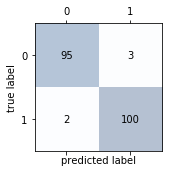

In [4]:
from sklearn.metrics import confusion_matrix

y_pred = gs_lr_tfidf.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix_LR.png', dpi=600)
plt.show()

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.971
Recall: 0.980
F1: 0.976


In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])

X_train2 = x_train[:, [4, 14]]


cv = list(StratifiedKFold(n_splits=3, 
                              random_state=1).split(x_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()